# Report

In [77]:
#imports
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import heapq
from heapq import heappush, heappop
import itertools
import datetime as d
import Modules

In [21]:
#Open file
fo = open('D:/Università/Data Science/ADM/HW4/full_dblp.json', 'r')
data = fo.read()
fo.close()
import json
dataset = json.loads(data)

In [24]:
#Create dictionaries
authors_dict, authors_dict_reference, publications_dict, conferences_dict=Modules.createDict(dataset)

In [25]:
#Create the graph and the dictionary with similar nodes
G, similar=Modules.createGraph(authors_dict, publications_dict)

In [26]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 851248\nNumber of edges: 3278279\nAverage degree:   7.7023'

## 2a.

In [27]:
#Starting from the original graph, create the subgraph for the conference in input
G2a = G.copy()
conf = input("Insert a conference name: ")
for node in nx.nodes(G):
    for tup in G.node[node]['conferences']:
        try:
            if tup[0] != conf: 
                G2a.remove_node(node)
        except:
            continue
print("Done!")

Insert a conference name: conf/atal/2015
Done!


In [28]:
nx.info(G2a)

'Name: \nType: Graph\nNumber of nodes: 45\nNumber of edges: 13\nAverage degree:   0.5778'

In [41]:
'''Compute the degree for nodes which is the number of edges each node has.'''
dg_values=list(nx.degree(G2a))

In [55]:
print(min(dg_values))
print(max(dg_values))

881867
882344


C:\Users\eleon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


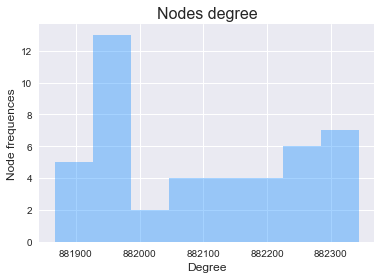

In [44]:
#Degree histogram
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (6, 4)})
fig, ax = plt.subplots()
sns.distplot(dg_values,  color="dodgerblue", bins=8, hist=True, kde=False)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Node frequences", fontsize=12)
plt.legend(prop={'size':16})
plt.title("Nodes degree", fontsize = 16)

plt.show()

In [ ]:
'''Looking at the histogram above, we can see that the minimum degree is 881867 and the maximum is 88234.
It means that the authors in this conference (given in input) are extremely connected to the others.'''

In [42]:
'''Compute the degree centrality for nodes.
The degree centrality for a node v is the fraction of nodes it is connected to.'''
dvalues=list(nx.degree_centrality(G2a).values())

C:\Users\eleon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


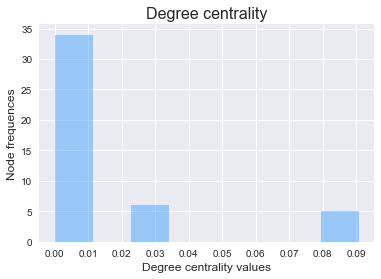

In [45]:
#Degree centrality histogram
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (6, 4)})
fig, ax = plt.subplots()
sns.distplot(dvalues,  color="dodgerblue", bins=8, hist=True, kde=False)
plt.xlabel("Degree centrality values", fontsize=12)
plt.ylabel("Node frequences", fontsize=12)
plt.legend(prop={'size':16})
plt.title("Degree centrality", fontsize = 16)
plt.xticks((0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09))

plt.show()

In [18]:
'''As we can see from the plot, we got high frequences for low values of the centrality.'''

'As we can see from the plot, we got high frequences for low values of the centrality.'

In [34]:
'''Compute the closeness centrality for nodes in a bipartite network.
The closeness of a node is the distance to all other nodes in the graph or in the case that the graph is not connected
to all other nodes in the connected component containing that node.'''
cvalues=list(nx.closeness_centrality(G2a).values())

C:\Users\eleon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


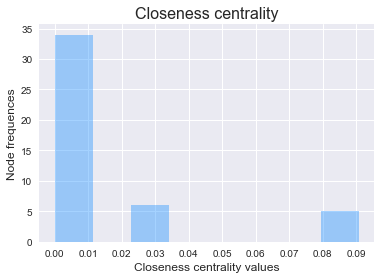

In [35]:
#Closeness centrality histogram
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (6, 4)})
fig, ax = plt.subplots()
sns.distplot(cvalues,  color="dodgerblue", bins=8, hist=True, kde=False)
plt.xlabel("Closeness centrality values", fontsize=12)
plt.ylabel("Node frequences", fontsize=12)
plt.legend(prop={'size':16})
plt.title("Closeness centrality", fontsize = 16)
plt.xticks((0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09))

plt.show()

In [ ]:
'''As we can see from the plot, even for Closeness centrality,
we got high frequences for values of the centrality between 0.00 and 0.01 and low frequences for other values.'''

In [36]:
'''Compute the shortest-path betweenness centrality for nodes.
Betweenness centrality of a node vv is the sum of the fraction of all-pairs shortest paths that pass through v.'''
bvalues=list(nx.betweenness_centrality(G2a, weight="weight").values())

C:\Users\eleon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


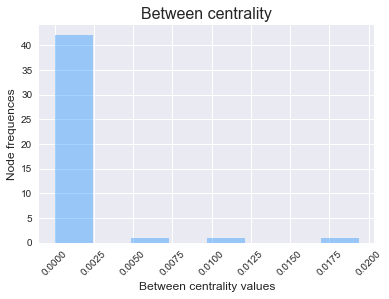

In [37]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (6, 4)})

fig, ax = plt.subplots()
sns.distplot(bvalues,  color="dodgerblue", bins=8, hist=True, kde=False)
plt.xlabel("Between centrality values", fontsize=12)
plt.ylabel("Node frequences", fontsize=12)
plt.legend(prop={'size':16})
plt.title("Between centrality", fontsize = 16)
plt.xticks(rotation=45)

plt.show()

In [ ]:
'''In this plot we can see that values which are different from 0.00 have low frequences,
even lower than in the other plots.'''

## 2b.


In [56]:
#Create the sub graph for the author in input at maximum hop distance given in input.
G2b = nx.Graph()
a = int(input("Enter an author id: "))
dist=int(input("Enter max hop distance: "))
G2b = G.subgraph(Modules.neighbors(G, a, dist))
print("Done!")
#256176 aris

Enter an author id: 256176
Enter max hop distance: 2
Done!


In [57]:
nx.info(G2b)

'Name: \nType: Graph\nNumber of nodes: 656\nNumber of edges: 2584\nAverage degree:   7.8780'

In [73]:
#here we assign the color "blue" to aris' node and "red" to others
for node in G2b.nodes():
    if (node == a):
        color = 'green'
        node_size=2000
    else:
        color = 'violet'
        node_size=250
    G2b.node[node]['color'] = color
    G2b.node[node]['node_size']= node_size

C:\Users\eleon\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\eleon\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\eleon\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\eleon\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

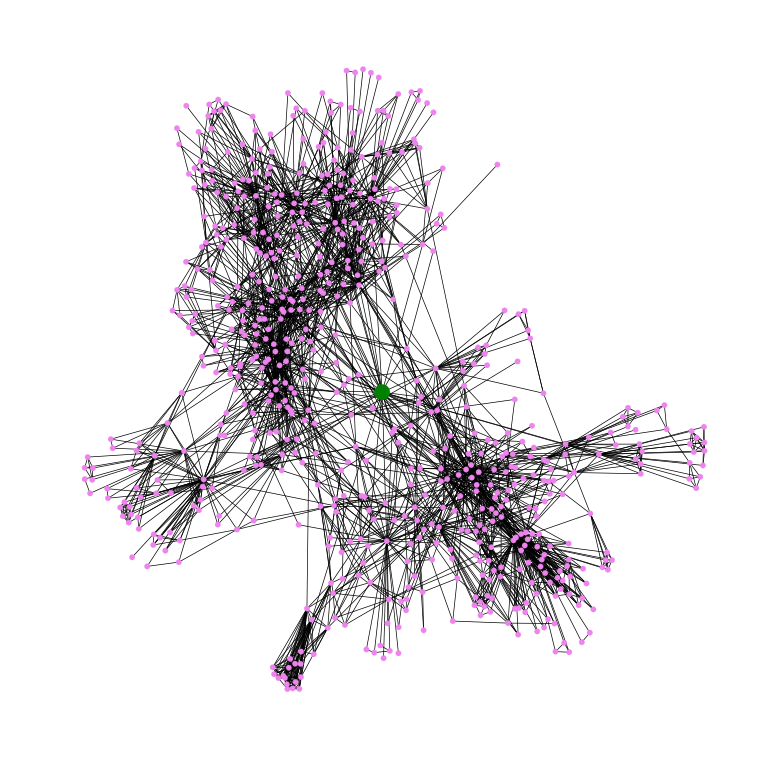

In [74]:
#plot of the subgraph
plt.clf()
plt.figure(num=None, figsize=(15,15), dpi=50)
nx.draw(G2b, node_shape= '.', node_size=list(nx.get_node_attributes(G2b,'node_size').values()), node_color = list(nx.get_node_attributes(G2b,'color').values()))
#nx.draw_networkx_edges(G2b, alpha=.5)
plt.show()

In [63]:
#Create the graph removing similar nodes
Gcon=Modules.removeNodes(G, similar)

In [64]:
nx.info(Gcon)

'Name: \nType: Graph\nNumber of nodes: 652901\nNumber of edges: 2523824\nAverage degree:   7.7311'

## 3a.

In [75]:
p=Modules.aris_subgraph(Gcon, similar)

In [76]:
Modules.distances_aris(p, similar)

Enter Author id: 16837
2.8776876177538426


## 3b.

In [80]:
st=d.datetime.now()
groupnumber=Modules.groupNumber(G, Gcon, similar)
print("Execution time: "+str(d.datetime.now()-st))

Insert author id or enter to stop: 264678 17002 15858 16438 16830 271768 17206 271791 271792 111329 271793 271797 271798 271799 271800 271801 271802 21484 271681 271811 271819
Execution time: 0:07:48.654791


In [89]:
#Print the output just for the first ten nodes.
i=0
for k,v in groupnumber.items():
    if i <= 10:
        print("Node "+str(k)+":", v)
    else:
        break
    i+=1

Node 1: (15858, 4.638938484764257)
Node 2: (15858, 3.8889384847642563)
Node 4: (111329, 3.824770286165978)
Node 5: (17002, 3.629759584145549)
Node 6: (271819, 3.792214175480484)
Node 7: (271819, 4.292214175480484)
Node 8: (271819, 4.292214175480484)
Node 9: (17002, 3.7315062388591804)
Node 10: (16830, 2.8485105982691583)
Node 11: (264678, 2.903743961352657)
Node 13: (16830, 4.403113245298119)
